<a href="https://colab.research.google.com/github/haolengoc/AI-Project/blob/main/15_assignments_of_Fuzzy_Logic%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lngcho","key":"7cf9562dfafd79af227109c9509f1c21"}'}

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

5.134458669472702


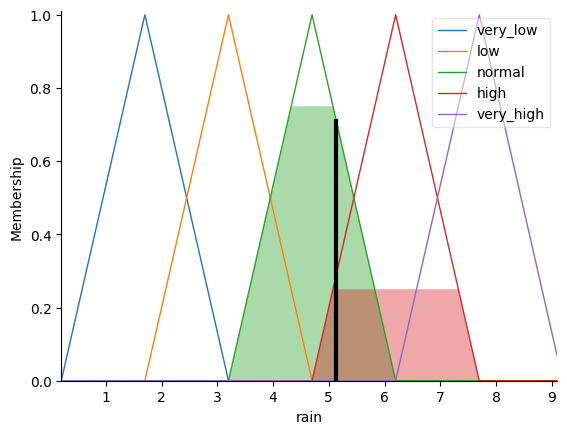

In [ ]:
#vÍ DỤ 2.1

wind = ctrl.Antecedent(np.arange(0.7, 3.2, 0.1), 'wind')
temp = ctrl.Antecedent(np.arange(20.4, 40.3, 0.1), 'temp')
rain = ctrl.Consequent(np.arange(0.2, 9.2, 0.1), 'rain')

wind['very_low'] = fuzz.trimf(wind.universe, [0.7, 1.1, 1.5])
wind['low'] = fuzz.trimf(wind.universe, [1.1, 1.5, 1.9])
wind['normal'] = fuzz.trimf(wind.universe, [1.5, 1.9, 2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.9, 2.3, 2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.3, 2.7, 3.1])

temp['very_low'] = fuzz.trimf(temp.universe, [20.4, 23.6, 26.8])
temp['low'] = fuzz.trimf(temp.universe, [23.6, 26.8, 30])
temp['normal'] = fuzz.trimf(temp.universe, [26.8, 30, 33.2])
temp['high'] = fuzz.trimf(temp.universe, [30, 33.2, 36.4])
temp['very_high'] = fuzz.trimf(temp.universe, [33.2, 36.4, 40.3])

rain['very_low'] = fuzz.trimf(rain.universe, [0.2, 1.7, 3.2])
rain['low'] = fuzz.trimf(rain.universe, [1.7, 3.2, 4.7])
rain['normal'] = fuzz.trimf(rain.universe, [3.2, 4.7, 6.2])
rain['high'] = fuzz.trimf(rain.universe, [4.7, 6.2, 7.7])
rain['very_high'] = fuzz.trimf(rain.universe, [6.2, 7.7, 9.2])

rule1 = ctrl.Rule(wind['very_low'] & temp['very_low'], rain['very_low'])
rule2 = ctrl.Rule(wind['low'] & temp['low'], rain['low'])
rule3 = ctrl.Rule(wind['normal'] & temp['normal'], rain['normal'])
rule4 = ctrl.Rule(wind['high'] & temp['high'], rain['high'])
rule5 = ctrl.Rule(wind['very_high'] & temp['very_high'], rain['very_high'])
rule6 = ctrl.Rule(wind['low'] & temp['normal'], rain['normal'])
rule7 = ctrl.Rule(wind['normal'] & temp['low'], rain['normal'])
rule8 = ctrl.Rule(wind['normal'] & temp['high'], rain['high'])
rule9 = ctrl.Rule(wind['high'] & temp['normal'], rain['high'])
rule10 = ctrl.Rule(wind['high'] & temp['very_high'], rain['very_high'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
rain_sim = ctrl.ControlSystemSimulation(control_system)

rain_sim.input['wind'] = 2
rain_sim.input['temp'] = 30
rain_sim.compute()

print(rain_sim.output['rain'])
rain.view(sim=rain_sim)



Nguy cơ tiểu đường 18.571428571428573 /100


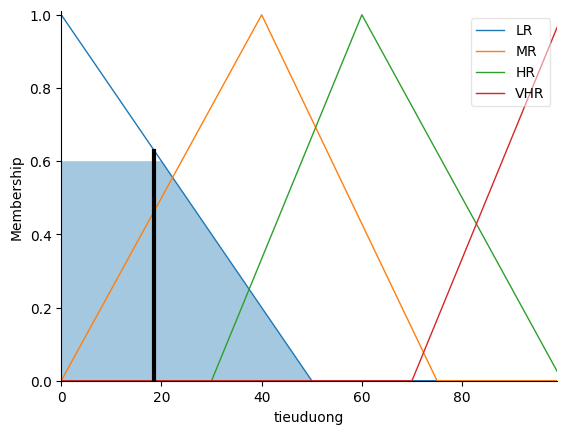

In [ ]:
#VÍ DỤ 2.2

sugar = ctrl.Antecedent(np.arange(50, 250.1, 0.1),'sugar')
bmi = ctrl.Antecedent(np.arange(10, 40.1, 0.1),'bmi')
wc = ctrl.Antecedent(np.arange(0, 10.1, 0.1),'wc')
Figue = ctrl.Antecedent(np.arange(0, 10.1, 0.1),'Figue')

tieuduong = ctrl.Consequent(np.arange(0,100,1),'tieuduong')

sugar['L'] = fuzz.trimf(sugar.universe,[50, 50, 100])
sugar['M'] = fuzz.trimf(sugar.universe,[75, 100, 150])
sugar['H'] = fuzz.trimf(sugar.universe,[125, 150, 250])
sugar['VH'] = fuzz.trimf(sugar.universe,[175, 250, 250])

bmi['TH'] = fuzz.trimf(bmi.universe,[10, 15, 20])
bmi['N'] = fuzz.trimf(bmi.universe,[15, 21, 27])
bmi['F'] = fuzz.trimf(bmi.universe,[21, 27, 33])
bmi['VF'] = fuzz.trimf(bmi.universe,[27, 33, 40])

wc['R'] = fuzz.trimf(wc.universe,[0, 0, 5])
wc['S'] = fuzz.trimf(wc.universe,[2.5, 5, 10])
wc['U'] = fuzz.trimf(wc.universe,[7.5, 10, 10])

Figue['L'] = fuzz.trimf(Figue.universe,[0, 0, 5])
Figue['M'] = fuzz.trimf(Figue.universe,[0, 5, 10])
Figue['H'] = fuzz.trimf(Figue.universe,[5, 10, 10])

tieuduong['LR'] = fuzz.trimf(tieuduong.universe,[0, 0, 50])
tieuduong['MR'] = fuzz.trimf(tieuduong.universe,[0, 40, 75])
tieuduong['HR'] = fuzz.trimf(tieuduong.universe,[30, 60, 100])
tieuduong['VHR'] = fuzz.trimf(tieuduong.universe,[70, 100, 100])

rule1 = ctrl.Rule(sugar['VH'] & wc['U'],tieuduong['VHR'])
rule2 = ctrl.Rule(sugar['VH'] & wc['S'],tieuduong['HR'])
rule3 = ctrl.Rule(sugar['H'] & wc['U'],tieuduong['HR'])
rule4 = ctrl.Rule(sugar['M'] & wc['R'],tieuduong['LR'])

rule5 = ctrl.Rule(sugar['VH'] & bmi['VF'],tieuduong['VHR'])
rule6 = ctrl.Rule(sugar['VH'] & bmi['F'],tieuduong['HR'])
rule7 = ctrl.Rule(sugar['H'] & bmi['F'],tieuduong['HR'])
rule8 = ctrl.Rule(sugar['H'] & bmi['N'],tieuduong['MR'])
rule9 = ctrl.Rule(sugar['M'] & bmi['N'],tieuduong['LR'])

rule10 = ctrl.Rule(sugar['VH'] & Figue['H'],tieuduong['VHR'])
rule11 = ctrl.Rule(sugar['H'] & Figue['H'],tieuduong['HR'])
rule12 = ctrl.Rule(sugar['H'] & Figue['M'],tieuduong['MR'])
rule13 = ctrl.Rule(sugar['M'] & Figue['L'],tieuduong['LR'])

control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
result = ctrl.ControlSystemSimulation(control_system)

result.input['sugar'] = 120
result.input['bmi'] = 21
result.input['wc'] = 4
result.input['Figue'] = 4

result.compute()
print('Nguy cơ tiểu đường',result.output['tieuduong'],'/100')
tieuduong.view(sim = result)

Mức giá cuối cùng 86.66666666666667 /100


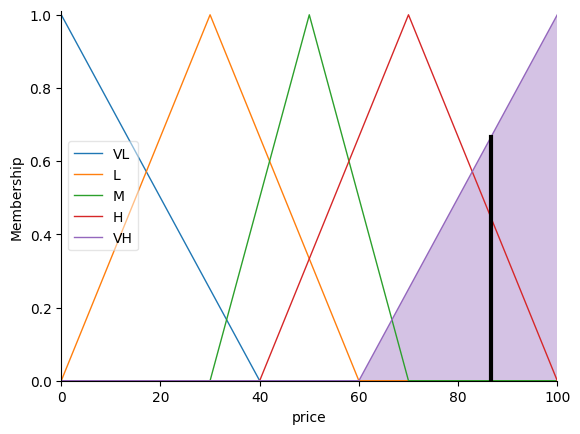

In [ ]:
#VÍ DỤ 2.3

demand = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'demand')
compete = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'compete')
production = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'production')
season = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'season')
stock = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'stock')

price = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'price')

demand['VL'] = fuzz.trimf(demand.universe, [0, 0, 2])
demand['L'] = fuzz.trimf(demand.universe, [1, 3, 5])
demand['M'] = fuzz.trimf(demand.universe, [4, 5, 10])
demand['H'] = fuzz.trimf(demand.universe, [7.5, 10, 10])

compete['VL'] = fuzz.trimf(compete.universe, [0, 0, 2])
compete['L'] = fuzz.trimf(compete.universe, [1, 3, 5])
compete['M'] = fuzz.trimf(compete.universe, [4, 5, 10])
compete['H'] = fuzz.trimf(compete.universe, [7.5, 10, 10])

production['VL'] = fuzz.trimf(production.universe, [0, 0, 2])
production['L'] = fuzz.trimf(production.universe, [1, 3, 5])
production['M'] = fuzz.trimf(production.universe, [4, 5, 10])
production['H'] = fuzz.trimf(production.universe, [7.5, 10, 10])

season['OP'] = fuzz.trimf(season.universe, [0, 0, 5])
season['N'] = fuzz.trimf(season.universe, [2.5, 5, 10])
season['P'] = fuzz.trimf(season.universe, [7.5, 10, 10])

stock['L'] = fuzz.trimf(stock.universe, [0, 0, 5])
stock['M'] = fuzz.trimf(stock.universe, [2.5, 5, 10])
stock['H'] = fuzz.trimf(stock.universe, [7.5, 8, 10])
stock['VH'] = fuzz.trimf(stock.universe, [9, 10, 10])

price['VL'] = fuzz.trimf(price.universe, [0, 0, 40])
price['L'] = fuzz.trimf(price.universe, [0, 30, 60])
price['M'] = fuzz.trimf(price.universe, [30, 50, 70])
price['H'] = fuzz.trimf(price.universe, [40, 70, 100])
price['VH'] = fuzz.trimf(price.universe, [60, 100, 100])

rule1 = ctrl.Rule(demand['H'] & compete['H'] & stock['L'] , price['VH'])
rule2 = ctrl.Rule(demand['H'] & season['P'] & stock['L'] , price['VH'])
rule3 = ctrl.Rule(demand['M'] & production['H'] & stock['L'] , price['VH'])

rule4 = ctrl.Rule(demand['H'] & compete['M'] & stock['M'] , price['H'])
rule5 = ctrl.Rule(demand['M'] & compete['H'] & stock['L'] , price['H'])
rule7 = ctrl.Rule(demand['H'] & season['P'] & stock['M'] , price['H'])

rule8 = ctrl.Rule(demand['M'] & compete['M'] & stock['M'] , price['M'])
rule9 = ctrl.Rule(demand['L'] & compete['H'] & stock['M'] , price['M'])
rule10 = ctrl.Rule(demand['M'] & production['M'] & stock['M'] , price['M'])

rule11 = ctrl.Rule(demand['L'] & compete['L'] & stock['H'] , price['L'])
rule12 = ctrl.Rule(demand['M'] & production['L'] & stock['H'] , price['L'])
rule13 = ctrl.Rule(demand['L'] & season['OP'] & stock['H'] , price['L'])

rule14 = ctrl.Rule(demand['L'] & compete['L'] & stock['VH'] , price['VL'])
rule15 = ctrl.Rule(demand['VL'] & season['OP'] & stock['VH'] , price['VL'])
rule16 = ctrl.Rule(demand['M'] & compete['VL'] & stock['VH'] , price['VL'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
result = ctrl.ControlSystemSimulation(control_system)

result.input['demand'] = 10
result.input['compete'] = 10
result.input['production'] = 10
result.input['season'] = 10
result.input['stock'] = 0
result.compute()

print('Mức giá cuối cùng',result.output['price'],'/100')
price.view(sim=result)



Thời gian giặt: 55.00000000000002
Mực nước: 9.16666666666667


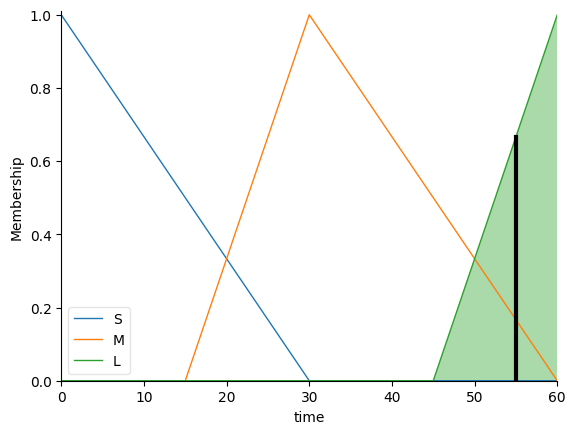

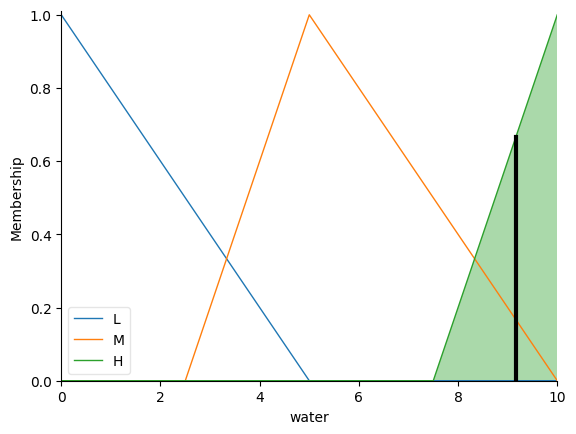

In [ ]:
#VÍ DỤ 2.4

load = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'load')
dirt = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'dirt')
fabric = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'fabric')

time = ctrl.Consequent(np.arange(0, 60.1, 0.1), 'time')
water = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'water')

load['S'] = fuzz.trimf(load.universe, [0, 0, 5])
load['M'] = fuzz.trimf(load.universe, [2.5, 5, 10])
load['L'] = fuzz.trimf(load.universe, [7.5, 10, 10])

dirt['L'] = fuzz.trimf(dirt.universe, [0, 0, 5])
dirt['M'] = fuzz.trimf(dirt.universe, [2.5, 5, 10])
dirt['H'] = fuzz.trimf(dirt.universe, [7.5, 10, 10])

fabric['D'] = fuzz.trimf(fabric.universe, [0, 0, 5])
fabric['N'] = fuzz.trimf(fabric.universe, [2.5, 5, 10])
fabric['H'] = fuzz.trimf(fabric.universe, [7.5, 10, 10])

time['S'] = fuzz.trimf(time.universe, [0, 0, 30])
time['M'] = fuzz.trimf(time.universe, [15, 30, 60])
time['L'] = fuzz.trimf(time.universe, [45, 60, 60])

water['L'] = fuzz.trimf(water.universe, [0, 0, 5])
water['M'] = fuzz.trimf(water.universe, [2.5, 5, 10])
water['H'] = fuzz.trimf(water.universe, [7.5, 10, 10])

rule1 = ctrl.Rule(load['S'] & dirt['L'], (time['S'], water['L']))
rule2 = ctrl.Rule(load['S'] & dirt['M'], (time['M'], water['M']))
rule3 = ctrl.Rule(load['S'] & dirt['H'], (time['L'], water['H']))
rule4 = ctrl.Rule(load['M'] & dirt['L'], (time['M'], water['M']))
rule5 = ctrl.Rule(load['M'] & dirt['M'], (time['L'], water['H']))
rule6 = ctrl.Rule(load['M'] & dirt['H'], (time['L'], water['H']))
rule7 = ctrl.Rule(load['L'] & dirt['L'], (time['M'], water['H']))
rule8 = ctrl.Rule(load['L'] & dirt['L'], (time['L'], water['H']))
rule9 = ctrl.Rule(load['L'] & dirt['M'], (time['L'], water['H']))
rule10 = ctrl.Rule(load['L'] & dirt['H'], (time['L'], water['H']))

rule11 = ctrl.Rule(fabric['D'], (time['S'], water['L']))
rule12 = ctrl.Rule(fabric['N'], (time['M'], water['M']))
rule13 = ctrl.Rule(fabric['H'], (time['L'], water['H']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule13])
result = ctrl.ControlSystemSimulation(control_system)

result.input['load'] = 5
result.input['dirt'] = 5
result.input['fabric'] = 10
result.compute()

print('Thời gian giặt:',result.output['time'])
print('Mực nước:',result.output['water'])

time.view(sim=result)
water.view(sim=result)

Tốc độ quạt 63.45255474452553
Mức độ làm mát 58.33333333333334


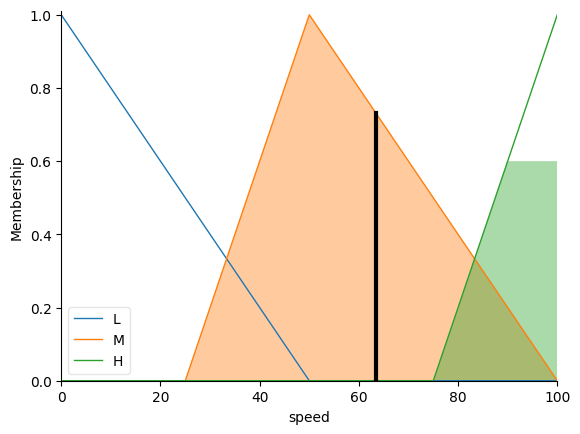

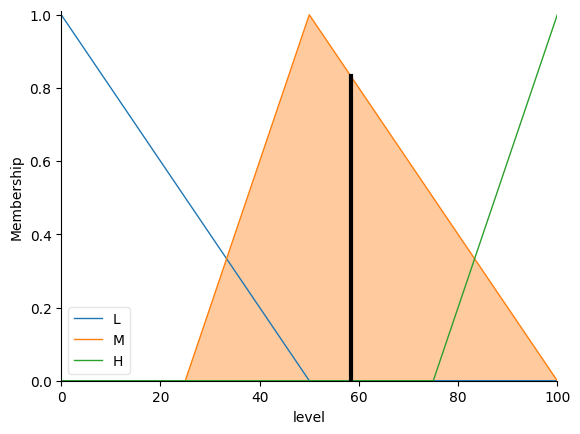

In [ ]:
#VÍ DỤ 2.5

temp = ctrl.Antecedent(np.arange(10, 40.1, 0.1), 'temp')
humid = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'humid')
human = ctrl.Antecedent(np.arange(0, 50.1, 0.1), 'human')

speed = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'speed')
level = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'level')

temp['C'] = fuzz.trimf(temp.universe, [10, 10, 15])
temp['CO'] = fuzz.trimf(temp.universe, [15, 20, 25])
temp['COM'] = fuzz.trimf(temp.universe, [20, 25, 30])
temp['W'] = fuzz.trimf(temp.universe, [25, 30, 40])
temp['H'] = fuzz.trimf(temp.universe, [35, 40, 40])

humid['L'] = fuzz.trimf(humid.universe, [0, 0, 50])
humid['M'] = fuzz.trimf(humid.universe, [25, 50, 100])
humid['H'] = fuzz.trimf(humid.universe, [75, 100, 100])

human['L'] = fuzz.trimf(human.universe, [0, 0, 25])
human['M'] = fuzz.trimf(human.universe, [0, 25, 50])
human['H'] = fuzz.trimf(human.universe, [25, 50, 50])

speed['L'] = fuzz.trimf(speed.universe, [0, 0, 50])
speed['M'] = fuzz.trimf(speed.universe, [25, 50, 100])
speed['H'] = fuzz.trimf(speed.universe, [75, 100, 100])

level['L'] = fuzz.trimf(level.universe, [0, 0, 50])
level['M'] = fuzz.trimf(level.universe, [25, 50, 100])
level['H'] = fuzz.trimf(level.universe, [75, 100, 100])

rule1 = ctrl.Rule(temp['C'], speed['L'])
rule2 = ctrl.Rule(temp['CO'], speed['L'])
rule3 = ctrl.Rule(temp['COM'], speed['M'])
rule4 = ctrl.Rule(temp['W'], speed['H'])
rule5 = ctrl.Rule(temp['H'], speed['H'])

rule6 = ctrl.Rule(temp['C'], level['L'])
rule7 = ctrl.Rule(temp['CO'], level['L'])
rule8 = ctrl.Rule(temp['COM'], level['M'])
rule9 = ctrl.Rule(temp['W'], level['H'])
rule10 = ctrl.Rule(temp['H'], level['H'])

rule11 = ctrl.Rule(humid['L'], level['L'])
rule12 = ctrl.Rule(humid['M'], speed['M'])
rule13 = ctrl.Rule(humid['H'], speed['H'])

rule14 = ctrl.Rule(human['L'], level['L'])
rule15 = ctrl.Rule(human['M'], speed['M'])
rule16 = ctrl.Rule(human['H'], speed['H'])

rule17 = ctrl.Rule(temp['H'] & humid['H'] & human['H'], (level['H'], speed['H']))
rule18 = ctrl.Rule(temp['COM'] & humid['M'] & human['M'], (level['M'], speed['M']))
rule19 = ctrl.Rule(temp['CO'] & humid['L'] & human['L'], (level['L'], speed['L']))

system_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
fan = ctrl.ControlSystemSimulation(system_control)

fan.input['temp'] = 25
fan.input['humid'] = 60
fan.input['human'] = 40

fan.compute()

print('Tốc độ quạt', fan.output['speed'])
print('Mức độ làm mát', fan.output['level'])

speed.view(sim = fan)
level.view(sim = fan)


Thời gian nấu: 99.9999999999999
Công suất: 85.0


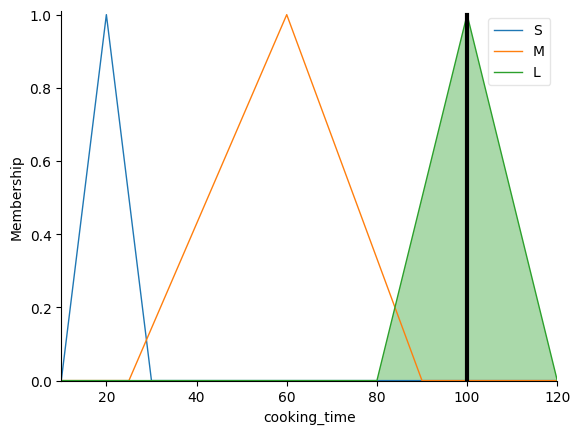

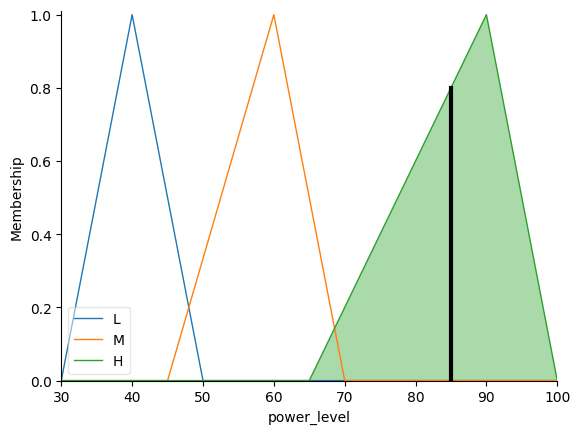

In [ ]:
#VÍ DỤ 2.6

food_weight = ctrl.Antecedent(np.arange(100, 1000.1, 0.1), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'food_type')
food_temp = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'food_temp')

cooking_time = ctrl.Consequent(np.arange(10, 120.1, 0.1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(30, 100.1, 0.1), 'power_level')

food_weight['L'] = fuzz.trimf(food_weight.universe, [100, 250, 400])
food_weight['M'] = fuzz.trimf(food_weight.universe, [300, 500, 700])
food_weight['H'] = fuzz.trimf(food_weight.universe, [600, 800, 1000])

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['M'] = fuzz.trimf(food_type.universe, [0.5, 1, 2])
food_type['H'] = fuzz.trimf(food_type.universe, [1.5, 2, 2])

food_temp['C'] = fuzz.trimf(food_temp.universe, [0, 5, 10])
food_temp['W'] = fuzz.trimf(food_temp.universe, [20, 25, 30])
food_temp['H'] = fuzz.trimf(food_temp.universe, [40, 50, 60])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [10, 20, 30])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [25, 60, 90])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [80, 100, 120])

power_level['L'] = fuzz.trimf(power_level.universe, [30, 40, 50])
power_level['M'] = fuzz.trimf(power_level.universe, [45, 60, 70])
power_level['H'] = fuzz.trimf(power_level.universe, [65, 90, 100])

rules = [
    ctrl.Rule(food_weight['L'], cooking_time['S']),
    ctrl.Rule(food_weight['M'], cooking_time['M']),
    ctrl.Rule(food_weight['H'], cooking_time['L']),
    ctrl.Rule(food_type['S'], power_level['L']),
    ctrl.Rule(food_type['M'], power_level['M']),
    ctrl.Rule(food_type['H'], power_level['H']),
    ctrl.Rule(food_temp['C'], cooking_time['L']),
    ctrl.Rule(food_temp['W'], cooking_time['M']),
    ctrl.Rule(food_temp['H'], cooking_time['S']),
    ctrl.Rule(food_weight['H'] & food_type['H'] & food_temp['C'], cooking_time['L'] , power_level['H']),
    ctrl.Rule(food_weight['M'] & food_type['S'] & food_temp['W'], cooking_time['M'] , power_level['L']),
    ctrl.Rule(food_weight['L'] & food_type['M'] & food_temp['H'], cooking_time['S'] , power_level['M'])
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['food_weight'] = 800
fuzzy_system.input['food_type'] = 2
fuzzy_system.input['food_temp'] = 10

fuzzy_system.compute()

print("Thời gian nấu:", fuzzy_system.output['cooking_time'])
print("Công suất:", fuzzy_system.output['power_level'])

cooking_time.view(sim=fuzzy_system)
power_level.view(sim=fuzzy_system)


Thời gian nấu: 99.9999999999999
Mức nhiệt: 39.99999999999999


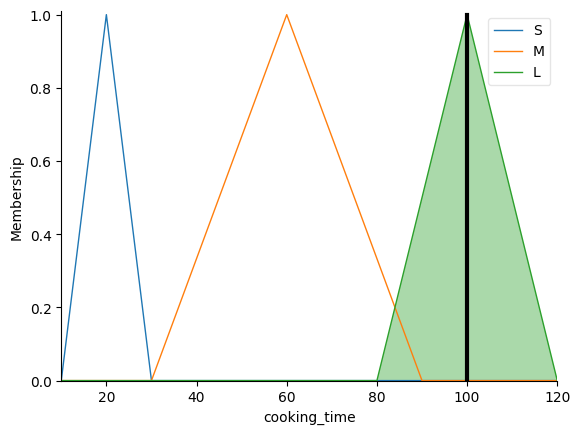

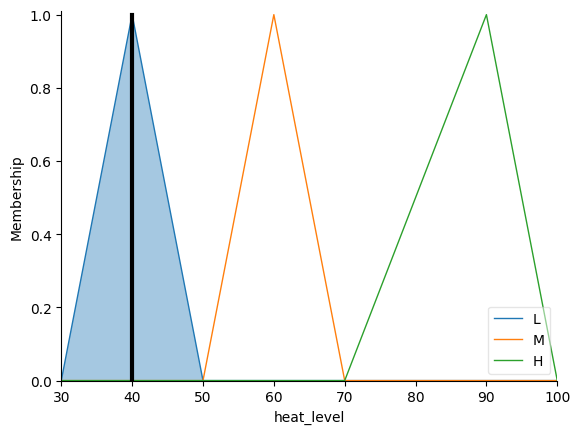

In [ ]:
#VÍ DỤ 2.7

food_type = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(100, 1000.1, 0.1), 'food_weight')
temp = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'temp')
water = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'water')

cooking_time = ctrl.Consequent(np.arange(10, 120.1, 0.1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(30, 100.1, 0.1), 'heat_level')

food_type['S'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['M'] = fuzz.trimf(food_type.universe, [0.5, 1, 2])
food_type['H'] = fuzz.trimf(food_type.universe, [1.5, 2, 2])

food_weight['L'] = fuzz.trimf(food_weight.universe, [100, 250, 400])
food_weight['M'] = fuzz.trimf(food_weight.universe, [300, 500, 700])
food_weight['H'] = fuzz.trimf(food_weight.universe, [600, 800, 1000])

temp['C'] = fuzz.trimf(temp.universe, [0, 5, 10])
temp['W'] = fuzz.trimf(temp.universe, [20, 25, 30])
temp['H'] = fuzz.trimf(temp.universe, [40, 50, 60])

water['L'] = fuzz.trimf(water.universe, [0, 0, 1])
water['M'] = fuzz.trimf(water.universe, [0.5, 1, 2])
water['H'] = fuzz.trimf(water.universe, [1.5, 2, 2])

cooking_time['S'] = fuzz.trimf(cooking_time.universe, [10, 20, 30])
cooking_time['M'] = fuzz.trimf(cooking_time.universe, [30, 60, 90])
cooking_time['L'] = fuzz.trimf(cooking_time.universe, [80, 100, 120])

heat_level['L'] = fuzz.trimf(heat_level.universe, [30, 40, 50])
heat_level['M'] = fuzz.trimf(heat_level.universe, [50, 60, 70])
heat_level['H'] = fuzz.trimf(heat_level.universe, [70, 90, 100])

rules = [
    ctrl.Rule(food_type['S'] & temp['H'], cooking_time['S']),
    ctrl.Rule(food_type['M'] & temp['W'], cooking_time['M']),
    ctrl.Rule(food_type['H'] & temp['C'], cooking_time['L']),
    ctrl.Rule(food_weight['L'] & food_type['S'], cooking_time['S']),
    ctrl.Rule(food_weight['M'] & food_type['M'], cooking_time['M']),
    ctrl.Rule(food_weight['H'] & food_type['H'], cooking_time['L']),
    ctrl.Rule(water['L'] & food_type['S'], heat_level['H']),
    ctrl.Rule(water['M'] & food_type['M'], heat_level['M']),
    ctrl.Rule(water['H'] & food_type['H'], heat_level['L']),
    ctrl.Rule(temp['C'] & water['H'], heat_level['H']),
    ctrl.Rule(temp['H'] & water['L'], heat_level['L'])
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['food_type'] = 2
fuzzy_system.input['food_weight'] = 800
fuzzy_system.input['temp'] = 10
fuzzy_system.input['water'] = 2

fuzzy_system.compute()

print("Thời gian nấu:", fuzzy_system.output['cooking_time'])
print("Mức nhiệt:", fuzzy_system.output['heat_level'])

cooking_time.view(sim=fuzzy_system)
heat_level.view(sim=fuzzy_system)


Liều dùng thuốc: 0.6666666666666666
Dịch truyền tĩnh mạch: 0.5777777777777777
Liệu pháp oxy: 0.6666666666666666


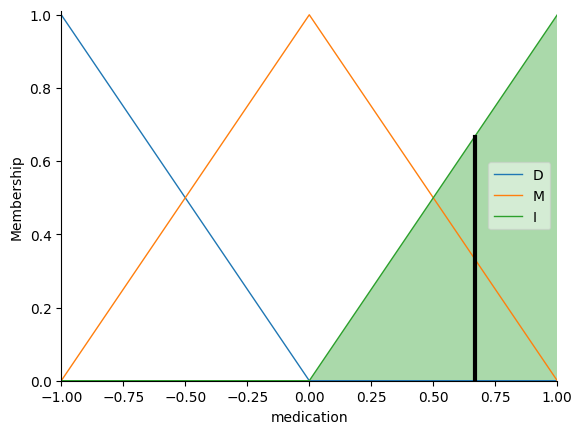

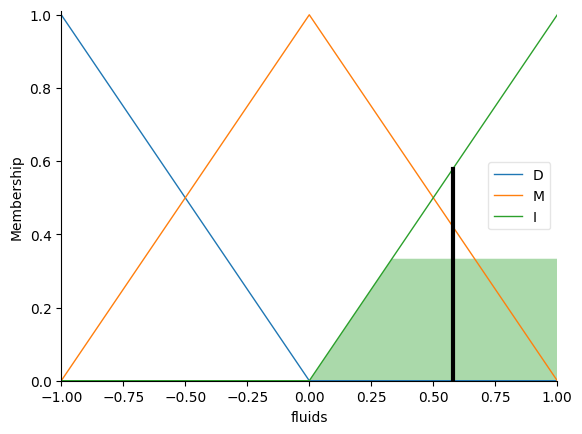

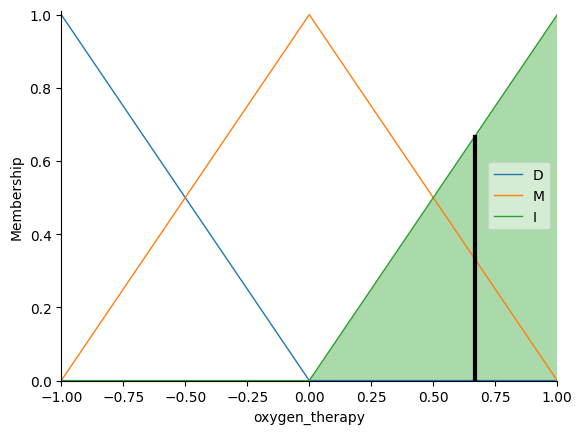

In [ ]:
#VÍ DỤ 2.8

heart_rate = ctrl.Antecedent(np.arange(40, 160.1, 0.1), 'heart_rate')
blood_pressure = ctrl.Antecedent(np.arange(60, 180.1, 0.1), 'blood_pressure')
body_temp = ctrl.Antecedent(np.arange(34, 40.1, 0.1), 'body_temp')
oxygen = ctrl.Antecedent(np.arange(85, 101.1, 0.1), 'oxygen')
blood_sugar = ctrl.Antecedent(np.arange(50, 200.1, 0.1), 'blood_sugar')

# Định nghĩa các biến đầu ra
medication = ctrl.Consequent(np.arange(-1, 2.1, 0.1), 'medication')
fluids = ctrl.Consequent(np.arange(-1, 2.1, 0.1), 'fluids')
oxygen_therapy = ctrl.Consequent(np.arange(-1, 2.1, 0.1), 'oxygen_therapy')

# Định nghĩa các tập mờ
heart_rate['L'] = fuzz.trimf(heart_rate.universe, [40, 50, 60])
heart_rate['N'] = fuzz.trimf(heart_rate.universe, [55, 80, 100])
heart_rate['H'] = fuzz.trimf(heart_rate.universe, [90, 120, 160])

blood_pressure['L'] = fuzz.trimf(blood_pressure.universe, [60, 75, 90])
blood_pressure['N'] = fuzz.trimf(blood_pressure.universe, [80, 105, 120])
blood_pressure['H'] = fuzz.trimf(blood_pressure.universe, [110, 140, 180])

body_temp['L'] = fuzz.trimf(body_temp.universe, [34, 35, 36])
body_temp['N'] = fuzz.trimf(body_temp.universe, [35.5, 36.5, 37.5])
body_temp['H'] = fuzz.trimf(body_temp.universe, [37, 38.5, 40])

oxygen['L'] = fuzz.trimf(oxygen.universe, [85, 88, 90])
oxygen['N'] = fuzz.trimf(oxygen.universe, [90, 95, 100])

blood_sugar['L'] = fuzz.trimf(blood_sugar.universe, [50, 60, 70])
blood_sugar['N'] = fuzz.trimf(blood_sugar.universe, [65, 100, 140])
blood_sugar['H'] = fuzz.trimf(blood_sugar.universe, [130, 160, 200])

medication['D'] = fuzz.trimf(medication.universe, [-1, -1, 0])
medication['M'] = fuzz.trimf(medication.universe, [0, 0, 1])
medication['I'] = fuzz.trimf(medication.universe, [1, 1, 2])

fluids['D'] = fuzz.trimf(fluids.universe, [-1, -1, 0])
fluids['M'] = fuzz.trimf(fluids.universe, [0, 0, 1])
fluids['I'] = fuzz.trimf(fluids.universe, [1, 1, 2])

oxygen_therapy['D'] = fuzz.trimf(oxygen_therapy.universe, [-1, -1, 0])
oxygen_therapy['M'] = fuzz.trimf(oxygen_therapy.universe, [0, 0, 1])
oxygen_therapy['I'] = fuzz.trimf(oxygen_therapy.universe, [1, 1, 2])

rule1 = ctrl.Rule(heart_rate['L'] & blood_pressure['L'], (fluids['I'], medication['I']))
rule2 = ctrl.Rule(heart_rate['H'] & blood_pressure['H'], medication['D'])
rule3 = ctrl.Rule(heart_rate['N'] & blood_pressure['N'], medication['M'])
rule4 = ctrl.Rule(body_temp['H'] & oxygen['L'], (oxygen_therapy['I'], medication['I']))
rule5 = ctrl.Rule(body_temp['N'] & oxygen['N'], medication['M'])
rule6 = ctrl.Rule(body_temp['L'] & oxygen['L'], (oxygen_therapy['I'], fluids['I']))
rule7 = ctrl.Rule(blood_sugar['H'], medication['I'])
rule8 = ctrl.Rule(blood_sugar['L'], medication['D'])
rule9 = ctrl.Rule(blood_pressure['H'] & blood_sugar['H'] & heart_rate['H'], medication['D'])
rule10 = ctrl.Rule(blood_pressure['L'] & oxygen['L'] & heart_rate['L'], (fluids['I'], oxygen_therapy['I'], medication['I']))
rule11 = ctrl.Rule(body_temp['H'] & blood_pressure['H'] & oxygen['N'], medication['I'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['heart_rate'] = 50
fuzzy_system.input['blood_pressure'] = 85
fuzzy_system.input['body_temp'] = 38.5
fuzzy_system.input['oxygen'] = 88
fuzzy_system.input['blood_sugar'] = 190

fuzzy_system.compute()

print("Liều dùng thuốc:", fuzzy_system.output['medication'])
print("Dịch truyền tĩnh mạch:", fuzzy_system.output['fluids'])
print("Liệu pháp oxy:", fuzzy_system.output['oxygen_therapy'])

medication.view(sim=fuzzy_system)
fluids.view(sim=fuzzy_system)
oxygen_therapy.view(sim=fuzzy_system)


Review sentiment: 2.5777777777777784/3


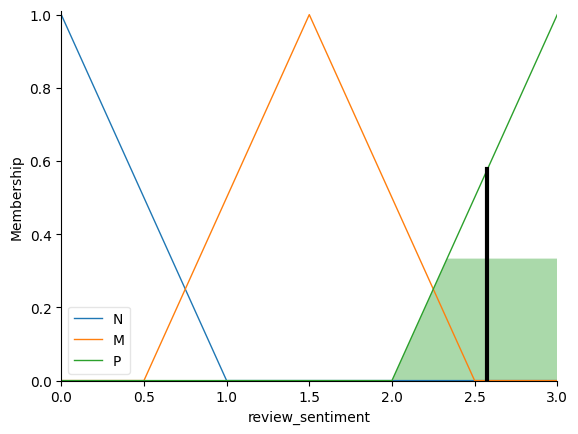

In [ ]:
#VÍ DỤ 2.9

sentiment_score = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sentiment_score')
emotion = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'emotion')
positive_words =  ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'positive_words')
negative_words =  ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'negative_words')

review_sentiment = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'review_sentiment')

sentiment_score['N'] = fuzz.trimf(sentiment_score.universe, [0, 0, 0.2])
sentiment_score['M'] = fuzz.trimf(sentiment_score.universe, [0.1, 0.3, 0.5])
sentiment_score['P'] = fuzz.trimf(sentiment_score.universe, [0.4, 0.7, 1])

emotion['L'] = fuzz.trimf(emotion.universe, [0, 0, 1])
emotion['M'] = fuzz.trimf(emotion.universe, [0.5, 1, 2])
emotion['H'] = fuzz.trimf(emotion.universe, [1.5, 3, 3])

positive_words['F'] = fuzz.trimf(positive_words.universe, [0, 0, 2])
positive_words['S'] = fuzz.trimf(positive_words.universe, [1, 3, 5])
positive_words['M'] = fuzz.trimf(positive_words.universe, [4, 7, 10])

negative_words['F'] = fuzz.trimf(negative_words.universe, [0, 0, 2])
negative_words['S'] = fuzz.trimf(negative_words.universe, [1, 3, 5])
negative_words['M'] = fuzz.trimf(negative_words.universe, [4, 7, 10])

review_sentiment['N'] = fuzz.trimf(review_sentiment.universe, [0, 0, 1])
review_sentiment['M'] = fuzz.trimf(review_sentiment.universe, [0.5, 1.5, 2.5])
review_sentiment['P'] = fuzz.trimf(review_sentiment.universe, [2, 3, 3])

rule1 = ctrl.Rule(sentiment_score['N'] & emotion['H'], review_sentiment['N'])
rule2 = ctrl.Rule(sentiment_score['N'] & emotion['L'], review_sentiment['M'])
rule3 = ctrl.Rule(sentiment_score['M'] & emotion['M'], review_sentiment['M'])
rule4 = ctrl.Rule(sentiment_score['P'] & emotion['H'], review_sentiment['P'])

rule5 = ctrl.Rule(positive_words['M'] & negative_words['F'], review_sentiment['P'])
rule6 = ctrl.Rule(positive_words['F'] & negative_words['M'], review_sentiment['N'])
rule7 = ctrl.Rule(positive_words['S'] & negative_words['S'], review_sentiment['M'])

rule8 = ctrl.Rule(sentiment_score['N'] & negative_words['M'] & emotion['H'], review_sentiment['N'])
rule9 = ctrl.Rule(sentiment_score['M'] & emotion['M'] & positive_words['F'], review_sentiment['M'])
rule10 = ctrl.Rule(sentiment_score['P'] & positive_words['M'] & emotion['H'], review_sentiment['P'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['sentiment_score'] = 0.5
fuzzy_system.input['emotion'] = 2
fuzzy_system.input['positive_words'] = 7
fuzzy_system.input['negative_words'] = 3

fuzzy_system.compute()

print(f"Review sentiment: {fuzzy_system.output['review_sentiment']}/3")

review_sentiment.view(sim=fuzzy_system)


Thời gian dự kiến: 10.519995757722045
Thưởng: 29.999999999999947
Đánh giá: 2.9999999999999996


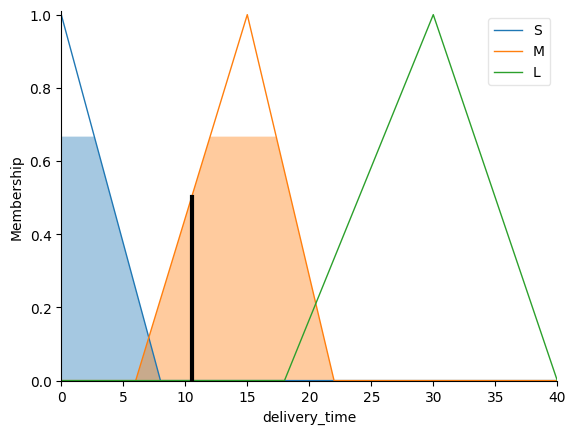

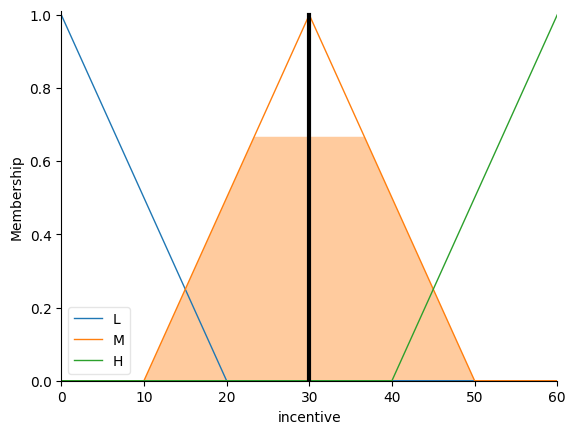

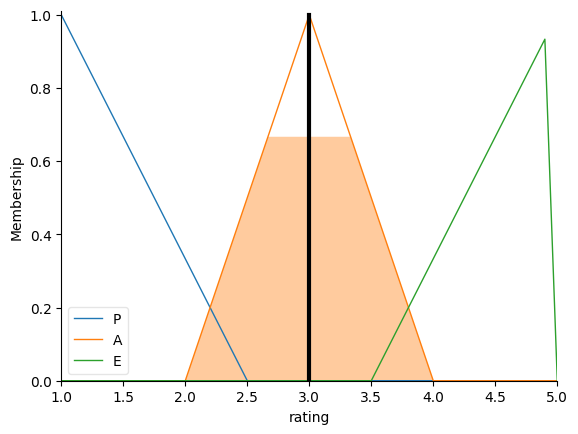

In [ ]:
#VÍ DỤ 2.10

traffic = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 15.1, 0.1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'weather')
prep_time = ctrl.Antecedent(np.arange(0, 25.1, 0.1), 'prep_time')
Figue = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Figue')

delivery_time = ctrl.Consequent(np.arange(0, 40.1, 0.1), 'delivery_time')
incentive = ctrl.Consequent(np.arange(0, 60.1, 0.1), 'incentive')
rating = ctrl.Consequent(np.arange(1, 5.1, 0.1), 'rating')

delivery_time['S'] = fuzz.trimf(delivery_time.universe, [0, 0, 8])
delivery_time['M'] = fuzz.trimf(delivery_time.universe, [6, 15, 22])
delivery_time['L'] = fuzz.trimf(delivery_time.universe, [18, 30, 40])

incentive['L'] = fuzz.trimf(incentive.universe, [0, 0, 20])
incentive['M'] = fuzz.trimf(incentive.universe, [10, 30, 50])
incentive['H'] = fuzz.trimf(incentive.universe, [40, 60, 60])

rating['P'] = fuzz.trimf(rating.universe, [1, 1, 2.5])
rating['A'] = fuzz.trimf(rating.universe, [2, 3, 4])
rating['E'] = fuzz.trimf(rating.universe, [3.5, 5, 5])

traffic['L'] = fuzz.trimf(traffic.universe, [0, 0, 5])
traffic['M'] = fuzz.trimf(traffic.universe, [0, 5, 10])
traffic['H'] = fuzz.trimf(traffic.universe, [5, 10, 10])

distance['S'] = fuzz.trimf(distance.universe, [0, 0, 3])
distance['M'] = fuzz.trimf(distance.universe, [0, 4, 7.5])
distance['L'] = fuzz.trimf(distance.universe, [7.5, 15, 15])

weather['C'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['R'] = fuzz.trimf(weather.universe, [0, 1.5, 3])
weather['S'] = fuzz.trimf(weather.universe, [1.5, 3, 3])

prep_time['F'] = fuzz.trimf(prep_time.universe, [0, 0, 5])
prep_time['M'] = fuzz.trimf(prep_time.universe, [0, 7.5, 15])
prep_time['L'] = fuzz.trimf(prep_time.universe, [15, 25, 25])

Figue['L'] = fuzz.trimf(Figue.universe, [0, 0, 5])
Figue['M'] = fuzz.trimf(Figue.universe, [0, 7.5, 15])
Figue['H'] = fuzz.trimf(Figue.universe, [15, 25, 25])

rule1 = ctrl.Rule(traffic['L'] & distance['S'], delivery_time['S'])
rule2 = ctrl.Rule(traffic['M'] & distance['M'], delivery_time['M'])
rule3 = ctrl.Rule(traffic['H'] & distance['L'], delivery_time['L'])
rule4 = ctrl.Rule(weather['C'], incentive['L'])
rule5 = ctrl.Rule(weather['R'], incentive['M'])
rule6 = ctrl.Rule(weather['S'], incentive['H'])
rule7 = ctrl.Rule(prep_time['F'] & traffic['L'], delivery_time['S'])
rule8 = ctrl.Rule(prep_time['M'] & traffic['M'], delivery_time['M'])
rule9 = ctrl.Rule(prep_time['L'] & traffic['H'], delivery_time['L'])
rule10 = ctrl.Rule(Figue['L'], rating['E'])
rule11 = ctrl.Rule(Figue['M'], rating['A'])
rule12 = ctrl.Rule(Figue['H'], rating['P'])
rule13 = ctrl.Rule(distance['L'] & weather['S'] & traffic['H'], delivery_time['L'])
rule13a = ctrl.Rule(distance['L'] & weather['S'] & traffic['H'], incentive['H'])
rule13b = ctrl.Rule(distance['L'] & weather['S'] & traffic['H'], rating['E'])
rule14 = ctrl.Rule(distance['S'] & weather['C'] & traffic['L'], (delivery_time['S'] , incentive['L']))
rule15 = ctrl.Rule(Figue['H'] & traffic['H'], (rating['E'] , delivery_time['L'], incentive['H']))
rule16 = ctrl.Rule(prep_time['M'], delivery_time['M'])
rule17 = ctrl.Rule(prep_time['L'], delivery_time['L'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4,
                                     rule5, rule6, rule7, rule8,
                                     rule9, rule10, rule11, rule12,
                                     rule13, rule13a, rule13b, rule14,
                                     rule15, rule16, rule17])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['traffic'] = 1
fuzzy_system.input['distance'] = 1
fuzzy_system.input['weather'] = 1
fuzzy_system.input['prep_time'] = 5
fuzzy_system.input['Figue'] = 5

fuzzy_system.compute()

print(f"Thời gian dự kiến: {fuzzy_system.output['delivery_time']}")
print(f"Thưởng: {fuzzy_system.output['incentive']}")
print(f"Đánh giá: {fuzzy_system.output['rating']}")

delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)

Mức giá bán hàng: 3.7376288659793824/5


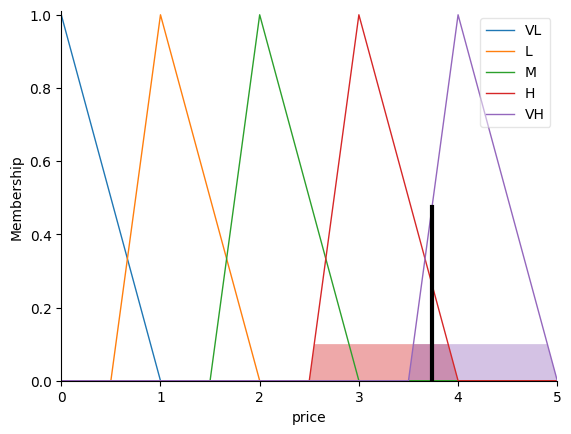

In [ ]:
#VÍ DỤ 2.11

demand = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'demand')
component_price = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'component_price')
cost = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'cost')
seasonal_demand = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'seasonal_demand')
inventory = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'inventory')

price = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'price')

demand['L'] = fuzz.trimf(demand.universe, [0, 0, 1])
demand['M'] = fuzz.trimf(demand.universe, [0.5, 1, 2])
demand['H'] = fuzz.trimf(demand.universe, [1.5, 2, 3])

component_price['L'] = fuzz.trimf(component_price.universe, [0, 0, 1])
component_price['M'] = fuzz.trimf(component_price.universe, [0.5, 1, 2])
component_price['H'] = fuzz.trimf(component_price.universe, [1.5, 2, 3])

cost['L'] = fuzz.trimf(cost.universe, [0, 0, 1])
cost['M'] = fuzz.trimf(cost.universe, [0.5, 1, 2])
cost['H'] = fuzz.trimf(cost.universe, [1.5, 2, 3])

seasonal_demand['L'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 1])
seasonal_demand['M'] = fuzz.trimf(seasonal_demand.universe, [0.5, 1, 2])
seasonal_demand['H'] = fuzz.trimf(seasonal_demand.universe, [1.5, 2, 3])

inventory['L'] = fuzz.trimf(inventory.universe, [0, 0, 1])
inventory['M'] = fuzz.trimf(inventory.universe, [0.5, 1, 2])
inventory['H'] = fuzz.trimf(inventory.universe, [1.5, 2, 3])

price['VL'] = fuzz.trimf(price.universe, [0, 0, 1])
price['L'] = fuzz.trimf(price.universe, [0.5, 1, 2])
price['M'] = fuzz.trimf(price.universe, [1.5, 2, 3])
price['H'] = fuzz.trimf(price.universe, [2.5, 3, 4])
price['VH'] = fuzz.trimf(price.universe, [3.5, 4, 5])

rule1 = ctrl.Rule(demand['H'] & component_price['H'] & inventory['L'], price['VH'])
rule2 = ctrl.Rule(demand['M'] & cost['H'] & inventory['L'], price['VH'])
rule3 = ctrl.Rule(demand['H'] & seasonal_demand['H'] & inventory['L'], price['VH'])

rule4 = ctrl.Rule(demand['H'] & component_price['M'] & inventory['M'], price['H'])
rule5 = ctrl.Rule(demand['M'] & component_price['H'] & inventory['L'], price['H'])
rule6 = ctrl.Rule(demand['H'] & seasonal_demand['M'] & inventory['L'], price['H'])

rule7 = ctrl.Rule(demand['M'] & component_price['M'] & inventory['M'], price['M'])
rule8 = ctrl.Rule(demand['M'] & component_price['H'] & inventory['M'], price['M'])
rule9 = ctrl.Rule(demand['L'] & component_price['H'] & inventory['M'], price['M'])
rule10 = ctrl.Rule(demand['M'] & cost['M'] & inventory['M'], price['M'])

rule11 = ctrl.Rule(demand['L'] & component_price['L'] & inventory['H'], price['L'])
rule12 = ctrl.Rule(demand['M'] & component_price['M'] & inventory['H'], price['L'])
rule13 = ctrl.Rule(demand['L'] & seasonal_demand['L'] & inventory['H'], price['L'])

rule14 = ctrl.Rule(demand['L'] & component_price['L'] & inventory['H'], price['VL'])
rule15 = ctrl.Rule(demand['L'] & seasonal_demand['L'] & inventory['H'], price['VL'])
rule16 = ctrl.Rule(demand['M'] & component_price['L'] & inventory['H'], price['VL'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                     rule6, rule7, rule8, rule9, rule10,
                                     rule11, rule12, rule13, rule14, rule15,
                                     rule16])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['demand'] = 3
fuzzy_system.input['component_price'] = 3
fuzzy_system.input['cost'] = 2
fuzzy_system.input['seasonal_demand'] = 1
fuzzy_system.input['inventory'] = 0.5

fuzzy_system.compute()

print(f"Mức giá bán hàng: {fuzzy_system.output['price']}/5")
price.view(sim=fuzzy_system)



Mức giá đi xe: 0.8884696016771486/3 (Mức giá thấp)
Điểm thưởng cho khách hàng: 1.548577546650359/3 (Điểm thưởng trung bình)


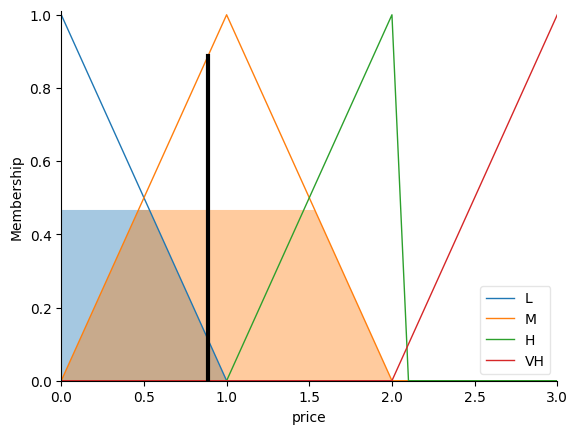

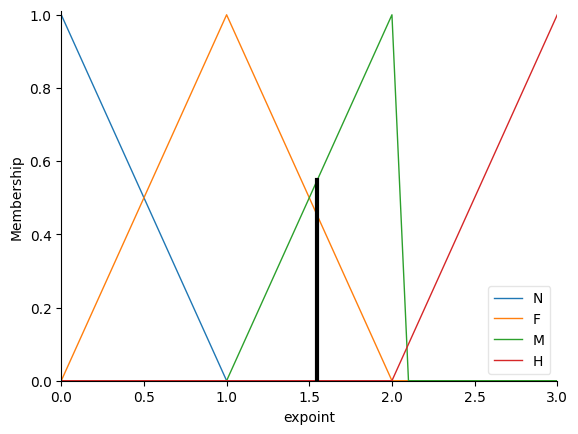

In [ ]:
#BÀI TẬP 1 - HỆ THỐNG GIÁ TIỀN GRAB BIKE

distance = ctrl.Antecedent(np.arange(0, 50.1, 0.1), 'distance')
traffic = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'traffic')
demand = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'demand')
weather = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'weather')
rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'rating')
punctuality = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'punctuality')

price = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'price')
expoint = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'expoint')

distance['S'] = fuzz.trimf(distance.universe, [0, 1.5, 3])
distance['M'] = fuzz.trimf(distance.universe, [1.5, 2, 8])
distance['L'] = fuzz.trimf(distance.universe, [5, 6, 20])
distance['XL'] = fuzz.trimf(distance.universe, [10, 15, 50])

traffic['L'] = fuzz.trimf(traffic.universe, [0, 10, 30])
traffic['M'] = fuzz.trimf(traffic.universe, [15, 20, 70])
traffic['H'] = fuzz.trimf(traffic.universe, [50, 60, 100])

demand['L'] = fuzz.trimf(demand.universe, [0, 15, 30])
demand['M'] = fuzz.trimf(demand.universe, [10, 20, 70])
demand['H'] = fuzz.trimf(demand.universe, [50, 60, 100])

weather['C'] = fuzz.trimf(weather.universe, [0, 0, 1])
weather['R'] = fuzz.trimf(weather.universe, [0, 1.5, 3])
weather['S'] = fuzz.trimf(weather.universe, [1.5, 3, 3])

rating['P'] = fuzz.trimf(rating.universe, [1, 1, 2.5])
rating['A'] = fuzz.trimf(rating.universe, [2, 3, 4])
rating['G'] = fuzz.trimf(rating.universe, [3.5, 5, 5])

punctuality['L'] = fuzz.trimf(punctuality.universe, [0, 0, 50])
punctuality['O'] = fuzz.trimf(punctuality.universe, [30, 40, 60])
punctuality['E'] = fuzz.trimf(punctuality.universe, [55, 60, 100])

price['L'] = fuzz.trimf(price.universe, [0, 0, 1])
price['M'] = fuzz.trimf(price.universe, [0, 1, 2])
price['H'] = fuzz.trimf(price.universe, [1, 2, 2])
price['VH'] = fuzz.trimf(price.universe, [2, 3, 3])

expoint['N'] = fuzz.trimf(expoint.universe, [0, 0, 1])
expoint['F'] = fuzz.trimf(expoint.universe, [0, 1, 2])
expoint['M'] = fuzz.trimf(expoint.universe, [1, 2, 2])
expoint['H'] = fuzz.trimf(expoint.universe, [2, 3, 3])

rule1=ctrl.Rule(distance['S'] & traffic['L'] & demand['L'], price['L'])
rule2=ctrl.Rule(distance['S'] & traffic['M'] & demand['H'], price['M'])
rule3=ctrl.Rule(distance['M'] & traffic['L'] & demand['H'], price['H'])
rule4=ctrl.Rule(distance['L'] & traffic['M'] & weather['C'], price['M'])
rule5=ctrl.Rule(distance['L'] & traffic['H'] & weather['S'], price['VH'])
rule6=ctrl.Rule(distance['XL'] & traffic['H'] & demand['H'], price['VH'])
rule7=ctrl.Rule(distance['M'] & traffic['L'] & demand['L'], price['M'])
rule8=ctrl.Rule(distance['S'] & traffic['H'] & weather['S'], price['H'])
rule9=ctrl.Rule(distance['XL'] & weather['S'], price['VH'])
rule10=ctrl.Rule(distance['M'] & traffic['M'] & weather['R'], price['M'])
rule11=ctrl.Rule(rating['G'] & punctuality['E'], expoint['H'])
rule12=ctrl.Rule(rating['A'] & punctuality['O'], expoint['H'])
rule13=ctrl.Rule(rating['P'] & punctuality['O'], expoint['M'])
rule14=ctrl.Rule(distance['L'] & traffic['H'] & punctuality['O'], expoint['H'])
rule15=ctrl.Rule(distance['M'] & traffic['M'] & rating['G'], expoint['M'])
rule16=ctrl.Rule(distance['XL'] & weather['S'] & rating['G'], expoint['H'])
rule17=ctrl.Rule(rating['P'] & punctuality['L'], expoint['N'])
rule18=ctrl.Rule(distance['S'] & rating['A'] & punctuality['O'], expoint['F'])
rule19=ctrl.Rule(distance['L'] & traffic['H'] & punctuality['L'], expoint['F'])
rule20=ctrl.Rule(distance['M'] & weather['R'] & rating['G'], expoint['M'])

control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                   rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15,
                                   rule16,rule17,rule18,rule19,rule20])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['distance']=2
fuzzy_system.input['traffic']=8
fuzzy_system.input['demand']=7
fuzzy_system.input['weather']=2
fuzzy_system.input['rating']=5
fuzzy_system.input['punctuality']=10

fuzzy_system.compute()

price_value = fuzzy_system.output['price']
expoint_value = fuzzy_system.output['expoint']

if 0 <= price_value < 1:
    price_category = "Mức giá thấp"
elif 1 <= price_value < 2:
    price_category = "Mức giá trung bình"
elif 2 <= price_value < 2.5:
    price_category = "Mức giá cao"
elif 2.5 <= price_value <= 3:
    price_category = "Mức giá rất cao"

if 0 <= expoint_value < 1:
    expoint_category = "Điểm thưởng thấp"
elif 1 <= expoint_value < 2:
    expoint_category = "Điểm thưởng trung bình"
elif 2 <= expoint_value < 2.5:
    expoint_category = "Điểm thưởng cao"
elif 2.5 <= expoint_value <= 3:
    expoint_category = "Điểm thưởng rất cao"

print(f"Mức giá đi xe: {price_value}/3 ({price_category})")
print(f"Điểm thưởng cho khách hàng: {expoint_value}/3 ({expoint_category})")

price.view(sim=fuzzy_system)
expoint.view(sim=fuzzy_system)

Tỷ lệ phần trăm chiết khấu là: 30.10000000000004


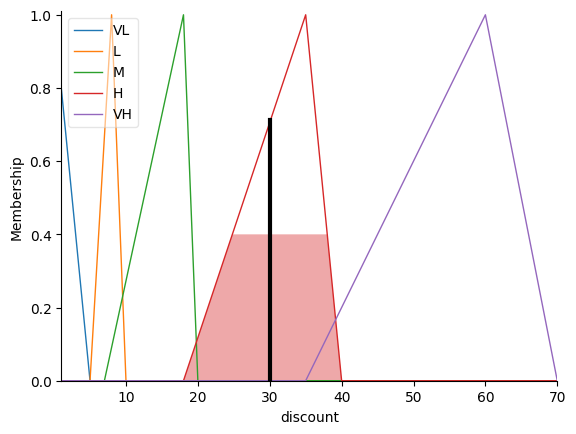

In [ ]:
#BÀI TẬP 2 - CHIẾN LƯỢC CHIẾT KHẤU CHO KHÁCH HÀNG Ở CÁC CỬA HÀNG SHOPEE

rating = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'rating')
volume = ctrl.Antecedent(np.arange(1, 2.6, 0.1), 'volume')
profitmar = ctrl.Antecedent(np.arange(1, 2.1, 0.1), 'profitmar')
event = ctrl.Antecedent(np.arange(1, 2.1, 0.1), 'event')
comdis = ctrl.Antecedent(np.arange(1, 2.1, 0.1), 'comdis')

discount = ctrl.Consequent(np.arange(1, 70.1, 0.1), 'discount')

rating['L'] = fuzz.trimf(rating.universe, [1, 3, 4])
rating['M'] = fuzz.trimf(rating.universe, [3.5, 4.5, 4.5])
rating['H'] = fuzz.trimf(rating.universe, [4.4, 5, 5])

volume['L'] = fuzz.trimf(volume.universe, [1, 1, 1.5])
volume['M'] = fuzz.trimf(volume.universe, [1.2, 1.5, 2])
volume['H'] = fuzz.trimf(volume.universe, [1.8, 2.5, 2.5])

profitmar['L'] = fuzz.trimf(profitmar.universe, [1, 1, 1.3])
profitmar['M'] = fuzz.trimf(profitmar.universe, [1.2, 1.5, 1.8])
profitmar['H'] = fuzz.trimf(profitmar.universe, [1.7, 2, 2])

event['N'] = fuzz.trimf(event.universe, [1, 1, 1.5])
event['M'] = fuzz.trimf(event.universe, [1.2, 1.5, 1.8])
event['H'] = fuzz.trimf(event.universe, [1.7, 2, 2])

comdis['L'] = fuzz.trimf(comdis.universe, [1, 1, 1.5])
comdis['M'] = fuzz.trimf(comdis.universe, [1.2, 1.5, 1.8])
comdis['H'] = fuzz.trimf(comdis.universe, [1.7, 2, 2])

discount['VL'] = fuzz.trimf(discount.universe, [0, 0, 5])
discount['L'] = fuzz.trimf(discount.universe, [5, 8, 10])
discount['M'] = fuzz.trimf(discount.universe, [7, 18, 20])
discount['H'] = fuzz.trimf(discount.universe, [18, 35, 40])
discount['VH'] = fuzz.trimf(discount.universe, [35, 60, 70])


rule1 = ctrl.Rule(rating['H'] & volume['H'] & profitmar['H'], discount['VL'])
rule2 = ctrl.Rule(rating['L'] & volume['L'] & profitmar['H'], discount['H'])
rule3 = ctrl.Rule(event['H'] & comdis['H'], discount['VH'])
rule4 = ctrl.Rule(rating['M'] & volume['M'] & profitmar['M'], discount['M'])
rule5 = ctrl.Rule(comdis['L'] & profitmar['L'] & volume['H'], discount['VL'])
rule6 = ctrl.Rule(rating['L'] & event['N'], discount['M'])
rule7 = ctrl.Rule(volume['L'] & profitmar['L'], discount['H'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['rating'] = 4.3
fuzzy_system.input['volume'] = 1.3
fuzzy_system.input['profitmar'] = 1
fuzzy_system.input['event'] = 2
fuzzy_system.input['comdis'] = 2

fuzzy_system.compute()

print(f"Tỷ lệ phần trăm chiết khấu là: {fuzzy_system.output['discount']}")
discount.view(sim=fuzzy_system)

Tỷ lệ phần trăm chiết khấu là: 14.999999999999995


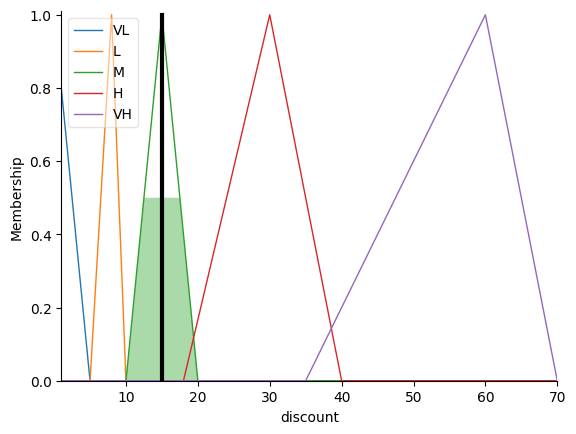

In [ ]:
#BÀI TẬP 3 - KẾ HOẠCH CHIẾN LƯỢC BÁN HÀNG CỦA SHOPEE DÀNH CHO CÁC CỬA HÀNG

product_demand = ctrl.Antecedent(np.arange(1, 3, 0.1), 'product_demand')
pressure = ctrl.Antecedent(np.arange(1, 3.1, 0.1), 'pressure')
reputation = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'reputation')
profitmar = ctrl.Antecedent(np.arange(1, 3.1, 0.1), 'profitmar')
seasonal_demand = ctrl.Antecedent(np.arange(1, 3.1, 0.1), 'seasonal_demand')

discount = ctrl.Consequent(np.arange(1, 70.1, 0.1), 'discount')

product_demand['L'] = fuzz.trimf(product_demand.universe, [1, 1, 1.5])
product_demand['M'] = fuzz.trimf(product_demand.universe, [1.2, 1.5, 2])
product_demand['H'] = fuzz.trimf(product_demand.universe, [1.8, 2.5, 3])

pressure['L'] = fuzz.trimf(pressure.universe, [1, 1, 1.5])
pressure['M'] = fuzz.trimf(pressure.universe, [1.2, 1.5, 2])
pressure['H'] = fuzz.trimf(pressure.universe, [1.8, 2.5, 3])

reputation['L'] = fuzz.trimf(reputation.universe, [1, 3, 4])
reputation['M'] = fuzz.trimf(reputation.universe, [3.5, 4.5, 4.5])
reputation['H'] = fuzz.trimf(reputation.universe, [4.4, 5, 5])

profitmar['L'] = fuzz.trimf(profitmar.universe, [1, 1, 1.8])
profitmar['M'] = fuzz.trimf(profitmar.universe, [1.5, 2, 2.5])
profitmar['H'] = fuzz.trimf(profitmar.universe, [2.2, 2.8, 3])

seasonal_demand['N'] = fuzz.trimf(seasonal_demand.universe, [1, 1, 1.5])
seasonal_demand['M'] = fuzz.trimf(seasonal_demand.universe, [1.5, 2, 2.5])
seasonal_demand['H'] = fuzz.trimf(seasonal_demand.universe, [2.2, 2.8, 3])

discount['VL'] = fuzz.trimf(discount.universe, [0, 0, 5])
discount['L'] = fuzz.trimf(discount.universe, [5, 8, 10])
discount['M'] = fuzz.trimf(discount.universe, [10, 15, 20])
discount['H'] = fuzz.trimf(discount.universe, [18, 30, 40])
discount['VH'] = fuzz.trimf(discount.universe, [35, 60, 70])

rule1 = ctrl.Rule(product_demand['H'] & pressure['L'] & profitmar['L'] , discount['VL'])
rule2 = ctrl.Rule(product_demand['L'] & pressure['H'] & profitmar['H'], discount['H'])
rule3 = ctrl.Rule(reputation['H'] & profitmar['M'] & seasonal_demand['H'], discount['M'])
rule4 = ctrl.Rule(pressure['H'] & seasonal_demand['H'] & profitmar['H'], discount['VH'])
rule5 = ctrl.Rule(reputation['L'] & product_demand['L'] & profitmar['L'], discount['M'])
rule6 = ctrl.Rule(product_demand['H'] & seasonal_demand['N'] & pressure['L'], discount['VL'])
rule7 = ctrl.Rule(profitmar['H'] & pressure['M'] & seasonal_demand['M'], discount['M'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['product_demand'] = 2.5
fuzzy_system.input['pressure'] = 1.5
fuzzy_system.input['reputation'] = 4.2
fuzzy_system.input['profitmar'] = 2.5
fuzzy_system.input['seasonal_demand'] = 2

fuzzy_system.compute()

print(f"Tỷ lệ phần trăm chiết khấu là: {fuzzy_system.output['discount']}")

discount.view(sim=fuzzy_system)

Số đơn hàng kết hợp là: 5.0
Mức độ ưu tiên là: 2.1666666666666656/3


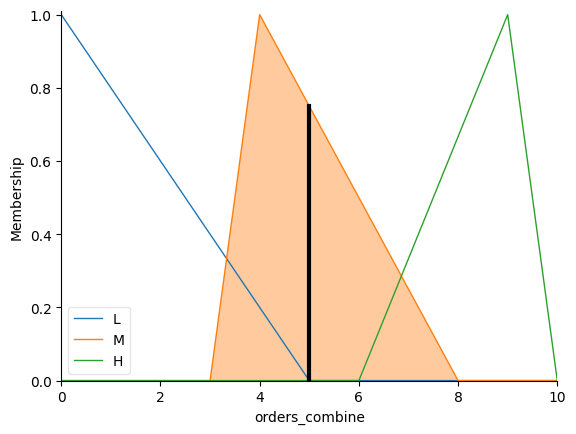

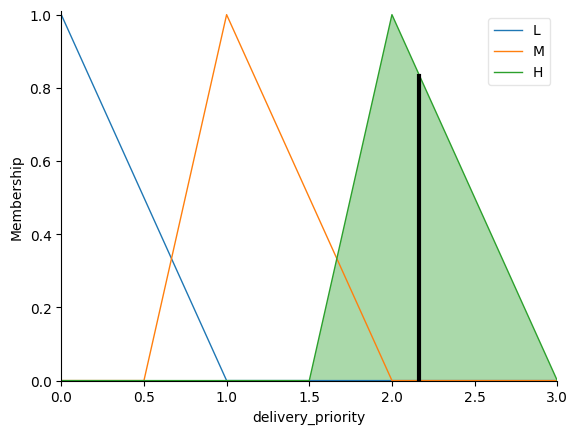

In [ ]:
#BÀI TẬP 4 - TỐI ƯU HÓA THỜI GIAN GIAO HÀNG VÀ TĂNG THU NHẬP CHO TÀI XẾ

density = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'density')
delivery_urgency = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'delivery_urgency')
load = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'load')
traffic = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'traffic')
profit = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'profit')

orders_combine = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'orders_combine')
delivery_priority = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'delivery_priority')

density['L'] = fuzz.trimf(density.universe, [0, 0, 1])
density['M'] = fuzz.trimf(density.universe, [0.5, 1, 2])
density['H'] = fuzz.trimf(density.universe, [1.5, 2, 3])

delivery_urgency['L'] = fuzz.trimf(delivery_urgency.universe, [0, 0, 1])
delivery_urgency['M'] = fuzz.trimf(delivery_urgency.universe, [0.5, 1, 2])
delivery_urgency['H'] = fuzz.trimf(delivery_urgency.universe, [1.5, 2, 3])

load['L'] = fuzz.trimf(load.universe, [0, 0, 1])
load['M'] = fuzz.trimf(load.universe, [0.5, 1, 2])
load['H'] = fuzz.trimf(load.universe, [1.5, 2, 3])

traffic['L'] = fuzz.trimf(traffic.universe, [0, 0, 1])
traffic['M'] = fuzz.trimf(traffic.universe, [0.5, 1, 2])
traffic['H'] = fuzz.trimf(traffic.universe, [1.5, 2, 3])

profit['L'] = fuzz.trimf(profit.universe, [0, 0, 1])
profit['M'] = fuzz.trimf(profit.universe, [0.5, 1, 2])
profit['H'] = fuzz.trimf(profit.universe, [1.5, 2, 3])

orders_combine['L'] = fuzz.trimf(orders_combine.universe, [0, 0, 5])
orders_combine['M'] = fuzz.trimf(orders_combine.universe, [3, 4, 8])
orders_combine['H'] = fuzz.trimf(orders_combine.universe, [6, 9, 10])

delivery_priority['L'] = fuzz.trimf(delivery_priority.universe, [0, 0, 1])
delivery_priority['M'] = fuzz.trimf(delivery_priority.universe, [0.5, 1, 2])
delivery_priority['H'] = fuzz.trimf(delivery_priority.universe, [1.5, 2, 3])

rule1 = ctrl.Rule(density['H'] & traffic['L'] & load['L'], orders_combine['H'])
rule2 = ctrl.Rule(density['M'] & traffic['H'] & delivery_urgency['M'], orders_combine['M'])
rule3 = ctrl.Rule(load['H'] & load['H'] & profit['M'], orders_combine['M'])
rule4 = ctrl.Rule(density['L'] & delivery_urgency['H'] & traffic['H'], orders_combine['M'])
rule5 = ctrl.Rule(profit['H'] & delivery_urgency['H'] & traffic['H'], orders_combine['M'])
rule6 = ctrl.Rule(delivery_urgency['H'] & profit['H'], delivery_priority['H'])
rule7 = ctrl.Rule(delivery_urgency['M'] & traffic['M'], delivery_priority['M'])
rule8 = ctrl.Rule(delivery_urgency['L'] & density['H'] & profit['L'], delivery_priority['L'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['density'] = 2.5
fuzzy_system.input['delivery_urgency'] = 2
fuzzy_system.input['load'] = 1
fuzzy_system.input['traffic'] = 2
fuzzy_system.input['profit'] = 2

fuzzy_system.compute()

print(f"Số đơn hàng kết hợp là: {fuzzy_system.output['orders_combine']}")
print(f"Mức độ ưu tiên là: {fuzzy_system.output['delivery_priority']}/3")

orders_combine.view(sim=fuzzy_system)
delivery_priority.view(sim=fuzzy_system)
